# Проект по A/B - тестам

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ks_2samp,ttest_ind, shapiro, levene
import scipy.stats as st
plt.style.use('seaborn-whitegrid')


------------------

##  <ins>Задание 1.</ins>

**Контекст**\
Мы много платим оператору из-за того,
что он сам по каждому заданию
звонит клиенту и ждёт ответа клиента.
Мы хотим попробовать снизить затраты на операторов,
внедрив систему,
которая будет сама звонить человеку
и в случае успеха перенаправлять задание оператору.
        
**Тест**\
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) мы продаём 
без автоматической системы дозвона,
а второй части (тесту) - с ней.
Целью этого теста
является снижение расходов на задание.

**Статистические вводные**\
Уровень значимости 5%.
Мы хотели бы различать 5%-ное 
изменение целевой метрики
с вероятностью 90%.

### 1. Необходимо выбрать метрику и привести аргументацию.

**Целевая метрика:** средняя величина расходов 

Это связано с тем, что можно не успеть набрать статистику по PV (Product Value) и NPV (Net Present Value)



In [22]:
df = pd.read_csv('hist_telesales.csv')
df.head()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68
3,3,1,0,22,0,-22
4,4,1,0,22,0,-22


In [23]:
df.describe()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
count,72161.000000,72161.000000,72161.000000,72161.000000,72161.000000,72161.000000
mean,36080.000000,0.599881,0.302172,200.581547,482.041352,281.459805
std,20831.230725,0.489926,0.459202,363.748786,814.227243,677.664908
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4406.000000
25%,18040.000000,0.000000,0.000000,21.000000,0.000000,-54.000000
50%,36080.000000,1.000000,0.000000,59.000000,0.000000,-18.000000
75%,54120.000000,1.000000,1.000000,182.000000,1258.000000,535.000000
max,72160.000000,1.000000,1.000000,6280.000000,41255.000000,41144.000000


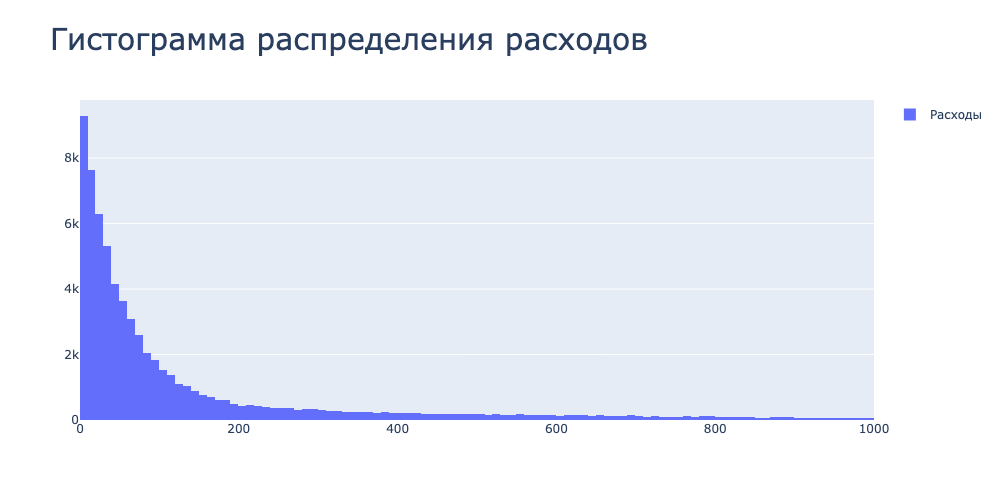

In [24]:

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(
    x=df['Расходы'],
    autobinx=True,
    showlegend=True, name='Расходы'),row=1,col=1,secondary_y=False)

fig.update_layout(
                width=1000, 
                height=500, 
                title_text="Гистограмма распределения расходов", 
                title_font_size=30,
                xaxis_range=[0, 1000])
fig.show('png')

### 2. Альтернатива в критерии.

$H_0: \mu = \mu_0$  - не произошло никаких изменений\
$H_1: \mu < \mu_0$ -  на тесте мы наблюдается уменьшение величины расходов \
где $\mu$ - средняя величина расходов

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

In [25]:
alpha = 0.05
beta = 0.1
z_alpha = st.norm.ppf(1-alpha) # используем одностороннюю альтернативу
z_beta = st.norm.ppf(beta)
n = df['Расходы'].var() * (z_alpha-z_beta)**2/(0.05*df['Расходы'].mean())**2/0.5
print(f'Необходимый объем выборки: {int(n+0.5)}')
print(f"Выборочное среднее: {df['Расходы'].mean():.02f}")
print(f"Выборочное среднее: {df['Расходы'].var():.02f}")


Необходимый объем выборки: 22531
Выборочное среднее: 200.58
Выборочное среднее: 132313.18


$$n = \frac{\sigma^2*(z_{1-\alpha}-z_{\beta})^2}{k*\Delta^2} \approx 22531,$$

где $\sigma^2 \approx 132311$  - дисперсия на основе исторических данных\
$\Delta = 0.05 * \mu_0 = 10$ - ожидаемое изменение\
$\alpha, \beta$ - вероятность ошибки I и II рода\
$z_{1-\alpha}$ - квантиль одностороннего стандартного распределения\
k = 0.5 - пропорция, в соответствии с которой делим тест/контроль




In [26]:
# тут рассматриваем расходы в качестве метрики

df_ctrl = pd.read_csv('Контроль.csv')
df_test = pd.read_csv('Тест.csv')
display(df_ctrl.describe())
display(df_test.describe())

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
count,22531.000000,22531.000000,22531.000000,22531.000000,22531.000000,22531.000000
mean,11265.000000,0.595846,0.291154,193.405353,466.398429,272.993076
std,6504.283794,0.490739,0.454305,352.840513,795.275619,657.541292
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3203.000000
25%,5632.500000,0.000000,0.000000,21.000000,0.000000,-55.000000
50%,11265.000000,1.000000,0.000000,58.000000,0.000000,-19.000000
75%,16897.500000,1.000000,1.000000,172.000000,1245.000000,444.000000
max,22530.000000,1.000000,1.000000,4706.000000,14914.000000,14590.000000


,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
count,22531.000000,22531.000000,22531.000000,22531.000000,22531.000000,22531.000000
mean,11265.000000,0.603702,0.300297,187.967068,477.022635,289.055568
std,6504.283794,0.489139,0.458397,335.168820,780.298358,644.034015
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3501.000000
25%,5632.500000,0.000000,0.000000,21.000000,0.000000,-54.000000
50%,11265.000000,1.000000,0.000000,59.000000,0.000000,-18.000000
75%,16897.500000,1.000000,1.000000,175.000000,1253.000000,589.000000
max,22530.000000,1.000000,1.000000,5067.000000,10679.000000,10579.000000


### 4. Принятие решения. Расписать подробно с аргументами.

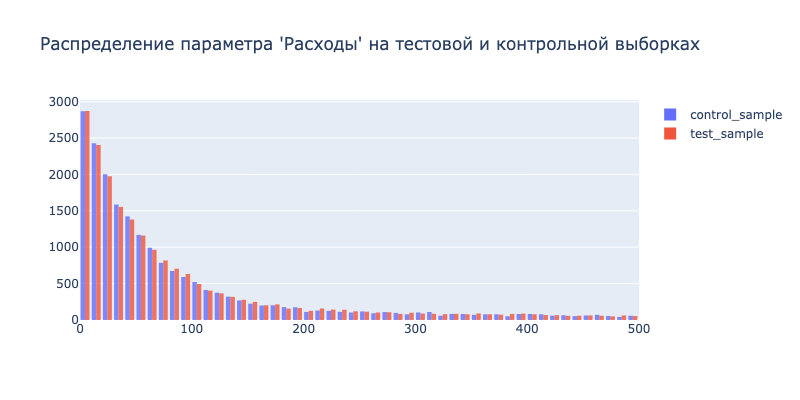

In [27]:
fig = make_subplots(rows=1, cols=1)


fig.add_trace(go.Histogram(
    x=df_ctrl['Расходы'],
    autobinx=True,
    showlegend=True, name='control_sample'),row=1,col=1)
fig.update_xaxes(range=[0, 2000], row=1,col=1)

fig.add_trace(go.Histogram(
    x=df_test['Расходы'],
    autobinx=True,
    showlegend=True, name='test_sample'),row=1,col=1)

fig.update_layout(
    width=800, 
    height=400, 
    title_text="Распределение параметра 'Расходы' на тестовой и контрольной выборках",
    xaxis_range=[0, 500]
    )
fig.update_traces(overwrite=True, marker={"opacity": 0.8})
fig.show('png')



### Тест Шапиро-Уилка
Для начала проверим **нормальность распределения средних** с помощью теста Шапиро-Уилка,
для этого нужно много выборок чтобы убедиться что среднее значение действительно распределено нормально

In [40]:
def shapiro_test(data, alpha=0.05):
   means_control = []
   n = 0
   while n < 1000:
      n += 1
      sample = data.sample(4000, random_state=1).mean()
      means_control.append(sample)
   p_value = shapiro(means_control).pvalue
   return (
            f"средние распределены нормально, pvalue = {p_value:.03}" 
            if p_value>alpha 
            else f'распределение средних отличается от нормального, pvalue = {p_value:.03f}')

print(f"Для контрольной выборки {shapiro_test(df_ctrl['Расходы'])}")
print(f"Для тестовой выборки {shapiro_test(df_test['Расходы'])}")



Для контрольной выборки средние распределены нормально, pvalue = 1.0
Для тестовой выборки средние распределены нормально, pvalue = 1.0


### Тест Левене
Проверим **однородность дисперсии** между тестовой и контрольной группами с помощью теста Левене

In [29]:
levene_p_value = levene(df_ctrl['Расходы'], df_test['Расходы']).pvalue
print(f"Выборки обладают однородной дисперсией, pvalue = {levene_p_value:.03f}" if levene_p_value > alpha else f"Дисперсия выборок неоднородна, pvalue = {levene_p_value:.03f}")

Выборки обладают однородной дисперсией, pvalue = 0.066


### Т - тест
Так как распределения полученных выборок является нормальным, а дисперсия однородна, применим Т-тест для сравнения средних. 

Наша **нулевая гипотеза**: Величина средних расходов на контрольной и тестовой выборках не изменилась

In [30]:
p = ttest_ind(df_test['Расходы'], df_ctrl['Расходы'], alternative='less', equal_var=True).pvalue
print(f'Отклоняем H0-гипотезу о равенстве средних?: {"Да" if p < alpha else "Нет"}, p-value = {p:.03f}')

Отклоняем H0-гипотезу о равенстве средних?: Да, p-value = 0.047


### **Вывод:**
Проведенный тест позволяет отклонить нулевую гипотезу о равенстве средних. \
Тем самым получено статистически значимое уменьшение средней величины расходов - которая выбрана в качестве целевой метрики. Таким образом, в результате внедрения новой автоматической системы дозвонов, удалось уменьшить расходы на оператора.

------------------

##  <ins>Задание 2.</ins>

**Контекст**

ЦБ смягчило правило,
ограничивающее варианты продажи услуги.
Мы хотим попробовать
более агрессивную продажу услуги,
но боимся,
что это повлияет на экономику основного продукта (КК - кредитная карта)
из-за негатива клиентов.

**Тест**

Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) 
мы будем предлагать услугу текущим способом,
а второй части (тесту) - новым более агрессивным способом.

Целью этого теста является увеличение доходности КК + услуги.

**Статистические вводные**

Проверка однородности выбранного параметра
осуществяется с уровнем значимости 2%.

Уровень значимости 5%.
Мы хотели бы различать 3%-ное
изменение целевой метрики
с вероятностью 85%.

### 1. Необходимо выбрать метрику и привести аргументацию.

В качестве метрики буду использовать **среднее значение NPV** - чистая приведенная стоимость, поскольку целю теста является увеличение суммарной доходности как от кредитных карт, так и от продажи услуг. Такая метрика учитывает влияние обоих факторов и позволяет оценить влияние теста на доходность продукта в целом

In [31]:
df2 = pd.read_csv('hist_credit_card.csv')
df2

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,19,21620.835463,0.138061,0,102,0,0,-102
1,1,27,24897.990863,0.035508,1,409,11686,1754,13031
2,2,50,23989.526947,0.098793,0,16,0,0,-16
3,3,18,38442.409756,0.365661,1,788,13738,1578,14528
4,4,24,21291.521612,0.036909,1,1048,6594,2213,7759
...,...,...,...,...,...,...,...,...,...
123250,123250,32,26099.633927,0.110756,0,47,0,0,-47
123251,123251,20,24579.749275,0.113920,1,594,14268,1672,15346
123252,123252,36,34062.902531,0.247122,1,77,5950,2017,7890
123253,123253,67,24609.838522,0.020752,1,279,6278,1847,7846


In [32]:
df2.describe()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
count,123255.000000,123255.000000,1.232550e+05,1.232550e+05,123255.000000,123255.000000,1.232550e+05,123255.000000,1.232550e+05
mean,61627.000000,39.673522,3.009385e+04,1.254254e-01,0.741544,421.941942,7.496049e+03,1486.105253,8.560212e+03
std,35580.798052,16.449416,1.748776e+04,1.105042e-01,0.437788,486.166550,2.158962e+04,1357.035726,2.175863e+04
min,0.000000,18.000000,2.000019e+04,5.004337e-08,0.000000,0.000000,0.000000e+00,0.000000,-5.100000e+02
25%,30813.500000,25.000000,2.201773e+04,4.053515e-02,0.000000,74.000000,0.000000e+00,0.000000,-1.000000e+00
50%,61627.000000,36.000000,2.523474e+04,9.475862e-02,1.000000,252.000000,6.316000e+03,1518.000000,7.755000e+03
75%,92440.500000,52.000000,3.183823e+04,1.801795e-01,1.000000,600.000000,8.807000e+03,1916.000000,1.044800e+04
max,123254.000000,75.000000,1.187963e+06,8.601029e-01,1.000000,5178.000000,5.073883e+06,75058.000000,5.075041e+06


### 2. Альтернатива в критерии.

$H_0: \overline {NPV}_{test} = \overline{NPV}_{control}$  - отсутствие различий в среднем значении NPV между тестовой и контрольной выборках\
$H_1: \overline {NPV}_{test} > \overline{NPV}_{control}$ - увеличение доходности на тестовой выборке в результате более агрессивной стратегии продажи услуги


### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Помимо параметров, которыми **NPV** задается напрямую: $NPV = PV_{кк} + PV_{услуги} - расходы$,
- доход от кредитной карты
- доход от услуги
- затраты на заявку

В качестве неявных параметров можно выделить следующие: 
- Возраст,
- Доход клиента,
- Вероятность банкротства,
- Флаг утилизации счёта 

Эти парамтры будут косвенно влиять на целевую метрику поскольку характеризуют поведение клиента

### 4.1. Каков размер выборки необходим для проведения теста?

In [33]:
alpha = 0.05
alpha_homogen = 0.02
beta = 0.15

# в зависимости от сформуллированной гипотезы, считаем соответствующие квантили одностороннего распределения
z_alpha = st.norm.ppf(1-alpha)
z_beta = st.norm.ppf(beta)
n = df2.NPV.var() * (z_alpha-z_beta)**2/(0.03*df2.NPV.mean())**2/0.5
print(f'Необходимый объем выборки: {int(n+0.5)}')
print(f"Выборочное среднее: {df2.NPV.mean():.02f}")
print(f"Выборочное среднее: {df2.NPV.var():.02f}")


Необходимый объем выборки: 103221
Выборочное среднее: 8560.21
Выборочное среднее: 473437865.83


$$n = \frac{\sigma^2*(z_{1-\alpha}-z_{\beta})^2}{k*\Delta^2} \approx 103221,$$

где $\sigma^2 \approx 459229.7$  - дисперсия на основе исторических данных\
$\Delta = 0.03 * \mu_0 = 8.44$ - ожидаемое изменение\
$\alpha, \beta$ - вероятность ошибки I и II рода\
$z_{1-\alpha}$ - квантиль одностороннего стандартного распределения\
k = 0.5 - пропорция, в соответствии с которой делим тест/контроль




In [34]:
sample_code = 36045
df_t = pd.read_csv('Тест21.csv')
df_c = pd.read_csv('Контроль21.csv')
display(df_t.describe()[['Вероятность банкротства','Расходы','PV КК','PV услуги', 'NPV']].loc[['mean', 'std','50%']], df_c.describe()[['Вероятность банкротства','Расходы','PV КК','PV услуги', 'NPV']].loc[['mean', 'std','50%']])

,Вероятность банкротства,Расходы,PV КК,PV услуги,NPV
mean,0.131458,419.121380,6613.184430,2449.411670,8643.474719
std,0.115598,487.550426,10703.417918,2274.559625,11362.846394
50%,0.099424,248.000000,5663.000000,2534.000000,8263.000000


,Вероятность банкротства,Расходы,PV КК,PV услуги,NPV
mean,0.124453,421.376532,7417.659720,1488.701040,8484.984228
std,0.109224,484.333310,12134.689123,1279.781302,12431.641636
50%,0.094051,252.000000,6332.000000,1523.000000,7768.000000


### 5. Проверка на однородность, применение критерия.

### Критерий Колмогорова-Смирнова
Проверим однородность выборок по параметру "Вероятность банкротства"

In [35]:
p_val_homogen = ks_2samp(df_t['Вероятность банкротства'], df_c['Вероятность банкротства']).pvalue

print(
        f"Выборки являются однородными по параметру 'Вероятность банкротства', pvalue = {p_val_homogen:.3f}" 

        if p_val_homogen >= alpha_homogen 
        
        else f"Выборки неоднородны по параметру 'Вероятность банкротства', pvalue = {p_val_homogen:.3f}")

Выборки неоднородны по параметру 'Вероятность банкротства', pvalue = 0.000


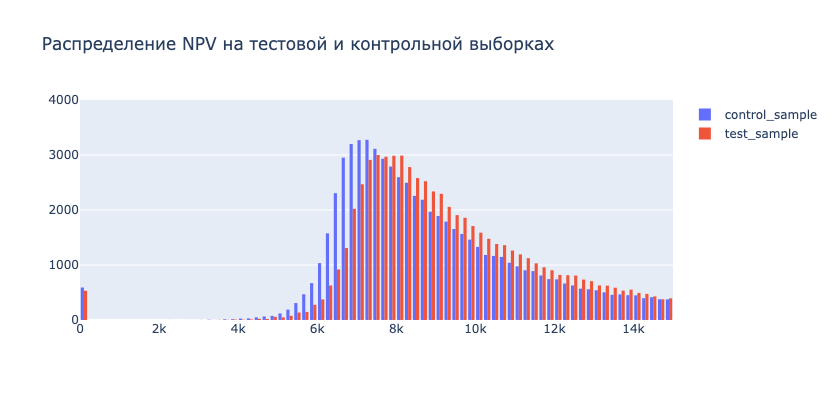

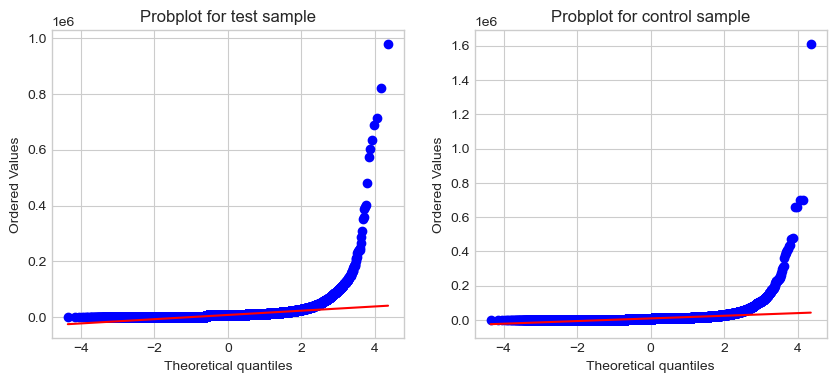

In [36]:
# Теперь посмотрим на распределение целевой метрики NPV на контроле и тесте

t_npv = df_t.NPV
c_npv = df_c.NPV
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(
    x=c_npv,
    autobinx=True,
    showlegend=True, name='control_sample'),row=1,col=1)
fig.update_xaxes(range=[0, 100000], row=1,col=1)

fig.add_trace(go.Histogram(
    x=t_npv,
    autobinx=True,
    showlegend=True, name='test_sample'),row=1,col=1)

fig.update_layout(
                width=835,
                height=400, 
				title_text="Распределение NPV на тестовой и контрольной выборках",
                xaxis_range = [0,15000], 
                yaxis_range = [0,4000])
fig.show("png")

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
st.probplot(t_npv, dist="norm", plot=plt)
ax.set_title("Probplot for test sample")
ax = fig.add_subplot(122)
st.probplot(c_npv, dist="norm", plot=plt)
ax.set_title("Probplot for control sample")
plt.show()


### Тест Шапиро-Уилка
Снова проверим **нормальность распределения средних** с помощью теста Шапиро-Уилка

In [41]:
print(f"Для контрольной выборки {shapiro_test(t_npv)}")
print(f"Для тестовой выборки {shapiro_test(c_npv)}")

Для контрольной выборки средние распределены нормально, pvalue = 1.0
Для тестовой выборки средние распределены нормально, pvalue = 1.0


### Тест Левене
Проверим **однородность дисперсии** между тестовой и контрольной группами с помощью теста Левене

In [38]:
levene_p_value = levene(t_npv, c_npv).pvalue
print(f"Выборки обладают однородной дисперсией, pvalue = {levene_p_value:.03f}" if levene_p_value > alpha else f"Дисперсия выборок неоднородна, pvalue = {levene_p_value:.03f}")

Выборки обладают однородной дисперсией, pvalue = 0.241


### T - тест
Так как распределения полученных выборок является нормальным, а дисперсия однородна, применим Т-тест для сравнения средних. 

Наша **нулевая гипотеза**: Средняя величина NPV на контрольной и тестовой выборках одинакова

In [39]:
p = ttest_ind(t_npv, c_npv, alternative='greater', equal_var=True).pvalue
print(f'Отклоняем H0-гипотезу?: {"Да" if p < alpha else "Нет"}, p-value = {p}') 

Отклоняем H0-гипотезу?: Да, p-value = 0.0012501245393038228


### **Вывод**: 
Проведенный тест позволяет отклонить нулевую гипотезу о равенстве среднего значения NPV на тестовой и контрольной группах. Тем самым наблюдается статистически значимое увеличение целевой метрики $\overline{\bf{NPV}}$ в результате более агрессивного метода предложения услуги, что характеризуется увеличением доходности от продажи кредитных карт, а также продажи услуг  
